<center><h1> Hotel Bookings data </h1></center>

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings

warnings.filterwarnings('ignore')

### Importing the data

In [3]:
raw_data = pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns', None)
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [4]:
for i in raw_data.columns:
    print("Null values in "+i+" is "+str(raw_data[i].isnull().sum()))

Null values in hotel is 0
Null values in is_canceled is 0
Null values in lead_time is 0
Null values in arrival_date_year is 0
Null values in arrival_date_month is 0
Null values in arrival_date_week_number is 0
Null values in arrival_date_day_of_month is 0
Null values in stays_in_weekend_nights is 0
Null values in stays_in_week_nights is 0
Null values in adults is 0
Null values in children is 4
Null values in babies is 0
Null values in meal is 0
Null values in country is 488
Null values in market_segment is 0
Null values in distribution_channel is 0
Null values in is_repeated_guest is 0
Null values in previous_cancellations is 0
Null values in previous_bookings_not_canceled is 0
Null values in reserved_room_type is 0
Null values in assigned_room_type is 0
Null values in booking_changes is 0
Null values in deposit_type is 0
Null values in agent is 16340
Null values in company is 112593
Null values in days_in_waiting_list is 0
Null values in customer_type is 0
Null values in adr is 0
Null

In [5]:
raw_data[['agent','company']] = raw_data[['agent','company']].fillna(0.0)

## For the missing values in the country column, replace it with mode (value that appears most often)
raw_data['country'].fillna(raw_data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
raw_data['children'].fillna(round(raw_data.children.mean()), inplace=True)

In [6]:
## Drop Rows where there is no adult, baby and child
raw_data = raw_data.drop(raw_data[(raw_data.adults+raw_data.babies+raw_data.children)==0].index)

In [7]:
## convert datatype of these columns from float to integer
raw_data[['children', 'company', 'agent']] = raw_data[['children', 'company', 'agent']].astype('int64')

 # Answering the questions given


### 1.  How Many Booking Were Cancelled?

In [8]:
df = raw_data.copy()

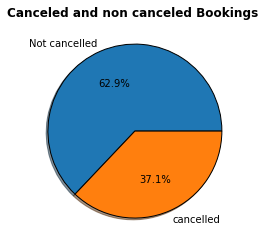

In [9]:
proprtion = df.is_canceled.value_counts()
labels = ['Not cancelled','cancelled']
plt.title("Canceled and non canceled Bookings ",weight='bold')
plt.pie(proprtion,labels=labels,shadow=True,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()

### 2.  What is the booking ratio between Resort Hotel and City Hotel?

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.hotel.value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

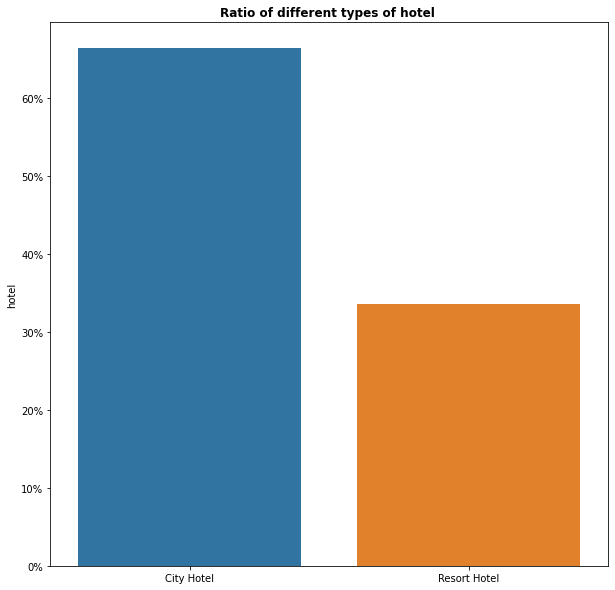

In [12]:
proprtion1 = df.hotel.value_counts()/df.hotel.value_counts().sum()*100
fig, ax = plt.subplots(figsize=(10,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
labels = ['City Hotel','Resort Hotel']
plt.title("Ratio of different types of hotel ",weight='bold')
# plt.pie(proprtion1,labels=labels,shadow=True,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
sns.barplot(labels,proprtion1,ax=ax)
plt.show()

#####  From this we can see that more than 60% of people  books CITY HOTEL while 30% people books RESORT HOTEL

###  3.  What is the percentage of booking for each year?

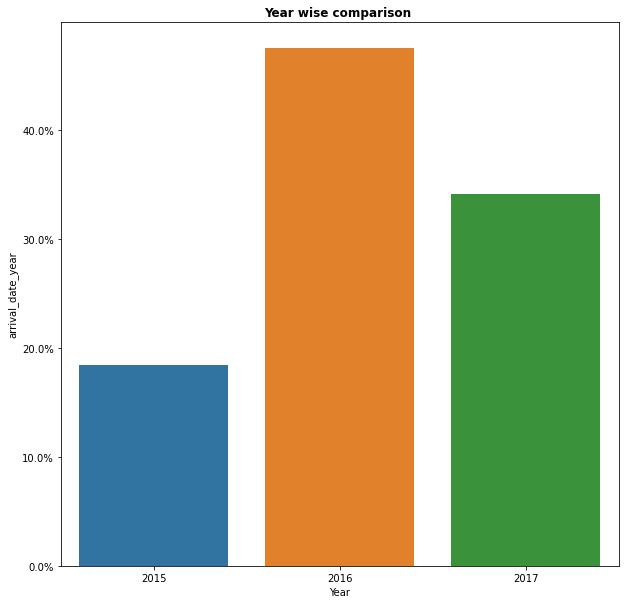

In [13]:
proprtion2 = df.arrival_date_year.value_counts()/df.arrival_date_year.value_counts().sum()*100
fig, ax = plt.subplots(figsize=(10,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
labels = df.arrival_date_year.value_counts().index
plt.title("Year wise comparison ",weight='bold')
plt.xlabel("Year")
# plt.pie(proprtion1,labels=labels,shadow=True,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
sns.barplot(labels,proprtion2,ax=ax)
plt.show()

##### From this we can see that 2016 has most of the bookings followed by 2017 and 2015. 
##### And the booking almost decreased to 15% from 2016 to 2017

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

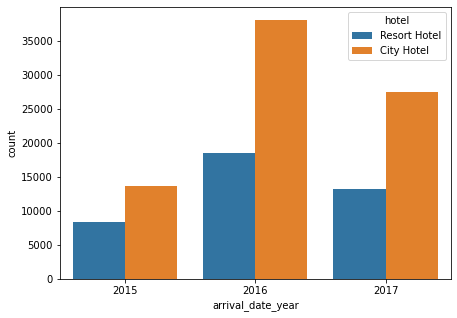

In [14]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df)

##### In this according to the hotel the ratio has been done. From this we can see that for both the type of hotel the business has been decreased tremendously

###  4.  Which is the busiest month for hotels?

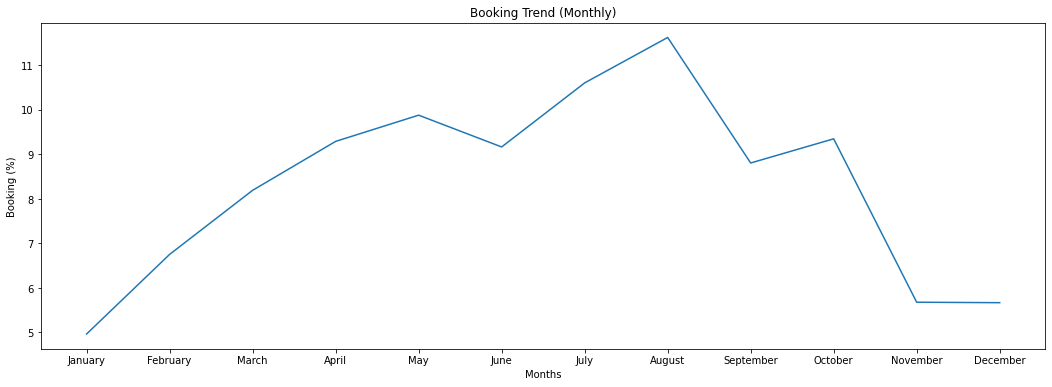

In [15]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plt.figure(figsize=(18,6))
plt.title("Booking Trend (Monthly)")
plt.xlabel("Months")
plt.ylabel("Booking (%)")
plt.plot(x, y.values)

##### From the above chart we can see that the busiest month for the HOTEL business is between JULY and AUGUST

### 5.  From which country most guests come?

In [16]:
# ! pip install pycountry

In [17]:
import pycountry as pc

In [18]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', '0    PRT', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'K

In [19]:
result = df.country.value_counts()/df.country.value_counts().sum()*100
result = result[:11]
country_name = [pc.countries.get(alpha_3=name).name for name in result.index]
country_name


['Portugal',
 'United Kingdom',
 'France',
 'Spain',
 'Germany',
 'Italy',
 'Ireland',
 'Belgium',
 'Brazil',
 'Netherlands',
 'United States']

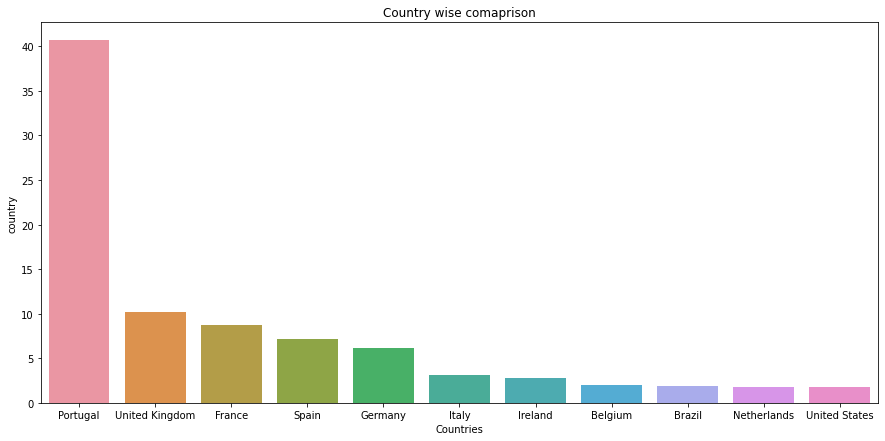

In [20]:
result = df.country.value_counts()/df.country.value_counts().sum()*100
result = result[:11]
country_name = [pc.countries.get(alpha_3=name).name for name in result.index]
plt.figure(figsize=(15,7))
plt.title("Country wise comaprison")
plt.xlabel("Countries")
plt.ylabel("Total booking (%)")
sns.barplot(country_name,result)
plt.show()

##### From the above visualization we can say that PORTUGAL citizens are the most who booked the hotels. Followed by UNITED KINGDOM, FRANCE, SPAIN, GERMANY.

##  6.  How Long People Stay in the hotel?

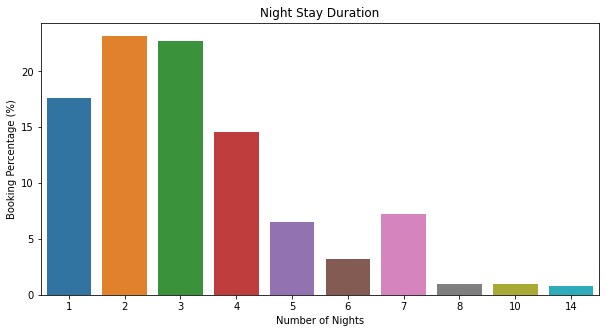

In [21]:
total_nights = df['stays_in_week_nights']+df['stays_in_weekend_nights']

result = total_nights.value_counts()/total_nights.value_counts().sum()*100
result = result[:10]
plt.figure(figsize=(10,5))
plt.title("Night Stay Duration")
plt.xlabel('Number of Nights')
plt.ylabel('Booking Percentage (%)')
sns.barplot(result.index,result)
plt.show()

##### Most people stay for one, two, or three. More than 60% of guests come under these three options

In [22]:
df_copy = df.copy()

<AxesSubplot:title={'center':'Hotel wise night stay duration (Top 10)'}, xlabel='total_nights', ylabel='count'>

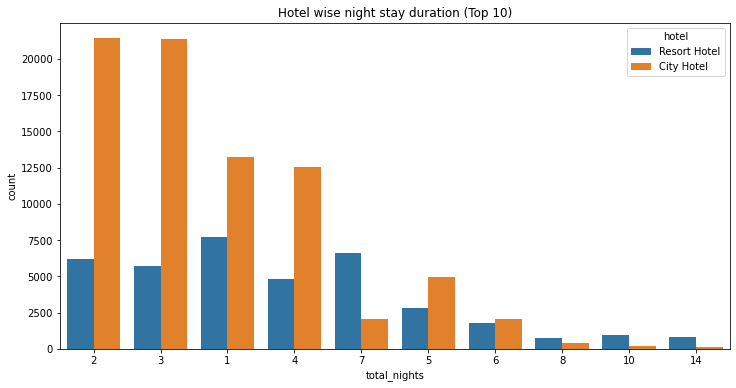

In [23]:
df_copy.loc[:,'total_nights'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_copy,
              order = df_copy.total_nights.value_counts().iloc[:10].index, ax=ax)

#####  For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
##### For City hotel, most popular stay duration is one, two, seven(week), and three respectively

## 7.  Which was the most booked accommodation type (Single, Couple, Family)?

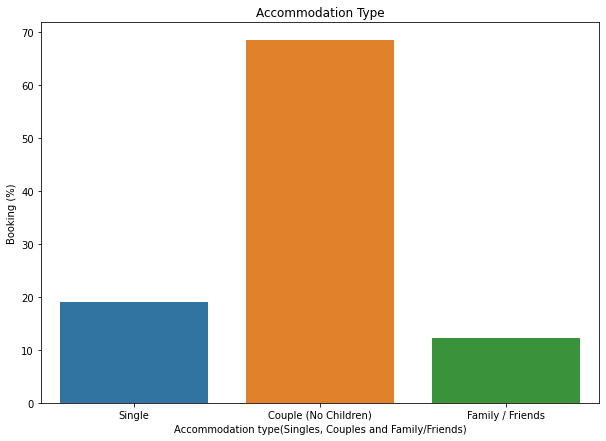

In [24]:
## Select single, couple, multiple adults and family
single   = df_copy[(df_copy.adults==1) & (df_copy.children==0) & (df_copy.babies==0)]
couple   = df_copy[(df_copy.adults==2) & (df_copy.children==0) & (df_copy.babies==0)]
family   = df_copy[df_copy.adults + df_copy.children + df_copy.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_copy.shape[0]*100 for x in count]


## Draw the curve
plt.figure(figsize=(10,7))
plt.title("Accommodation Type")
plt.xlabel("Accommodation type(Singles, Couples and Family/Friends)")
plt.ylabel("Booking (%)")
sns.barplot(names,count_percent)
plt.show()

##### Couples are the most popular ACCOMMODATION TYPE

## 8.  Predictive model to make predictions in the future whether the booking will be cancelled or not

#### FEATURE SELECTION AND FEATURE ENGINEERING

In [25]:
df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

#### Lets copy the whole dataset to a new variable

In [26]:
df_subset = df.copy()

#### Now lets do some data cleaning

In [27]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

#### Dropping an unnecessary columns

In [28]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)


In [29]:
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

#### Plotting a Heatmap of the data to correlate the variable with the target variables

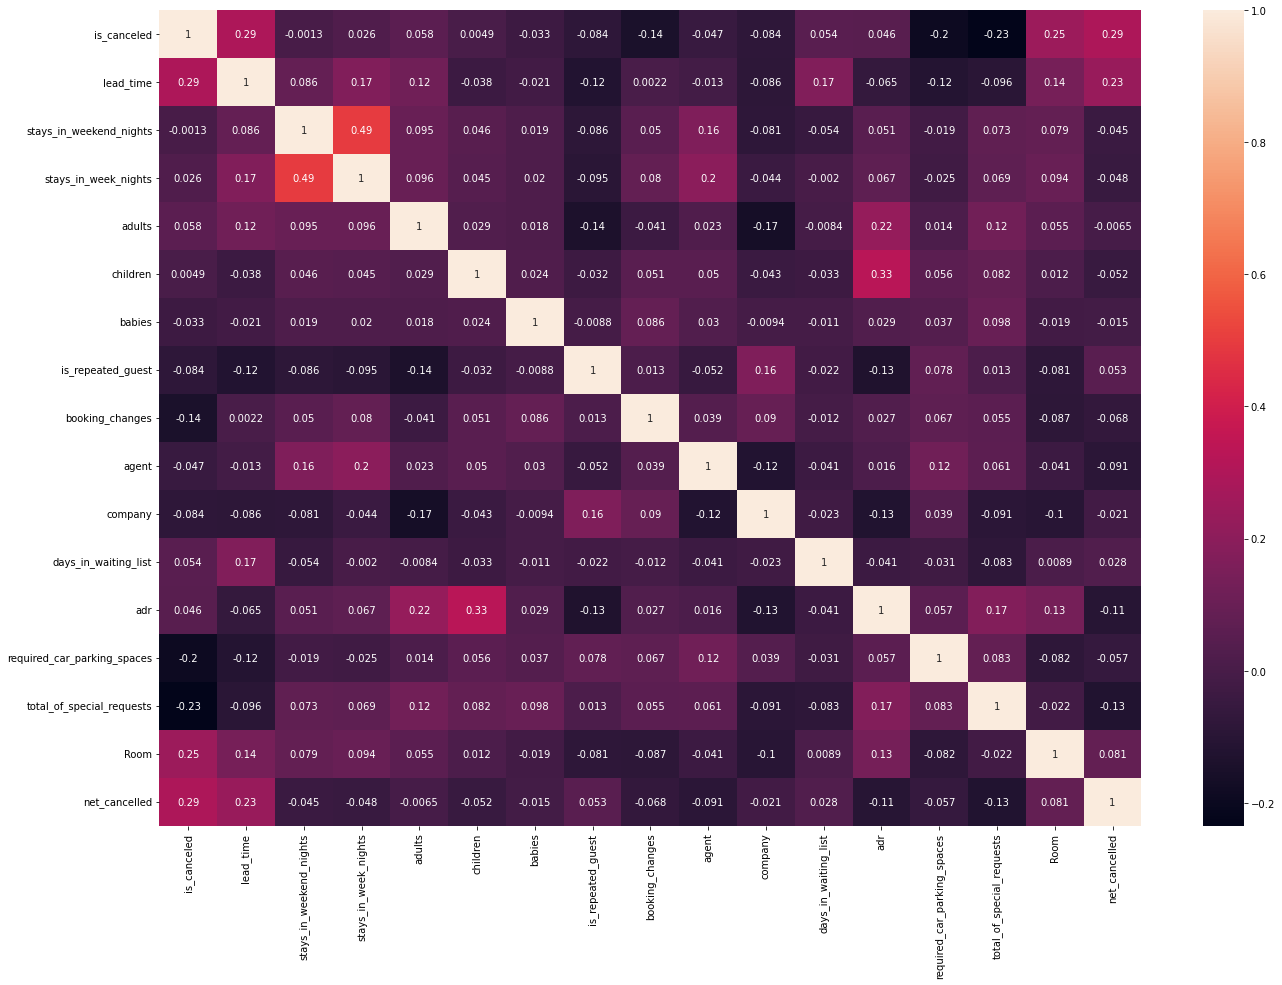

In [30]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

####  Transforming the data and converting the String data to Numerical Data

In [31]:
def transform(dataframe):
    
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    print(categorical_features)
    ## Apply Label Encoding on all categorical features
    dataframe[categorical_features] = dataframe[categorical_features].apply(lambda x: le.fit_transform(x))
    return dataframe
df_subset = transform(df_subset)

['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']


In [32]:
df_subset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'Room',
       'net_cancelled'],
      dtype='object')

#### Splitting the data set into train and test 

In [33]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(df_subset, 'is_canceled')

#### Training the model

In [34]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

#### Testing the model and finding the training and testing accuracy

In [35]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 0.9956043710224032
Test Accuracy of our model is: 0.9956043710224032


#### Lets test the MODEL

In [36]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[10].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[10]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 0
Actual Value		: 0


<center><h1>END OF THE CODE</h1></center>